<a href="https://colab.research.google.com/github/DiegoSalcedoT/F-Futbol-Fans-/blob/main/Departamento_Marketing_Pro_Fans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 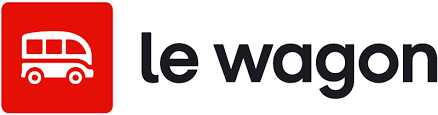

In [ ]:
# Sergio
from google.colab import auth
from google.colab import drive
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sys

# get credentials
auth.authenticate_user()
#connect to drive and bigquery
drive.mount('/content/gdrive')
query = 'SELECT * FROM `peaceful-fact-405016.daco_marketing.campaigns`'
df = pd.read_gbq(query, project_id="peaceful-fact-405016")

sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/')
from graph_funcs import count_plot, multi_count_plot #  https://drive.google.com/file/d/1-j6nrm6xpw3ux1lBx9vzSgJbVTC9Sr12/view?usp=sharing

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Monica
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT * FROM `le-wagon-data-analytics-405716.departamento_marketing_dfc`
'''
df = pd.read_gbq(query, project_id="le-wagon-data-analytics-405716")

In [ ]:
# Silvia
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT * FROM `sacred-reactor-373421.fans_marketing.daco_campaigns`
'''
df = pd.read_gbq(query, project_id="sacred-reactor-373421")

In [ ]:
# Diego
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT * FROM `da-bootcamp-with-football.departamento_marketing_pro_fans.daco_campaigns`
'''
df = pd.read_gbq(query, project_id="advance-stratum-405017")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Limpiando los datos:
- eliminar valores
- revisar tipos de datos

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) # transform string to date format
df = df.drop('int64_field_0', axis=1) # Delete Unknown column

In [ ]:
df.head(3)

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack
0,3009,1971,PhD,Widow,143340.0,0,0,2022-07-09,8,1,...,0,1,0,1,256,32,2924,0,0,480
1,3968,1979,2n Cycle,Divorced,131412.0,0,0,2022-06-28,77,1,...,0,1,0,1,258,20,1836,15,0,387
2,5331,1986,Graduation,Married,149970.0,0,0,2021-09-11,8,1,...,0,0,0,0,1796,102,1174,741,0,258


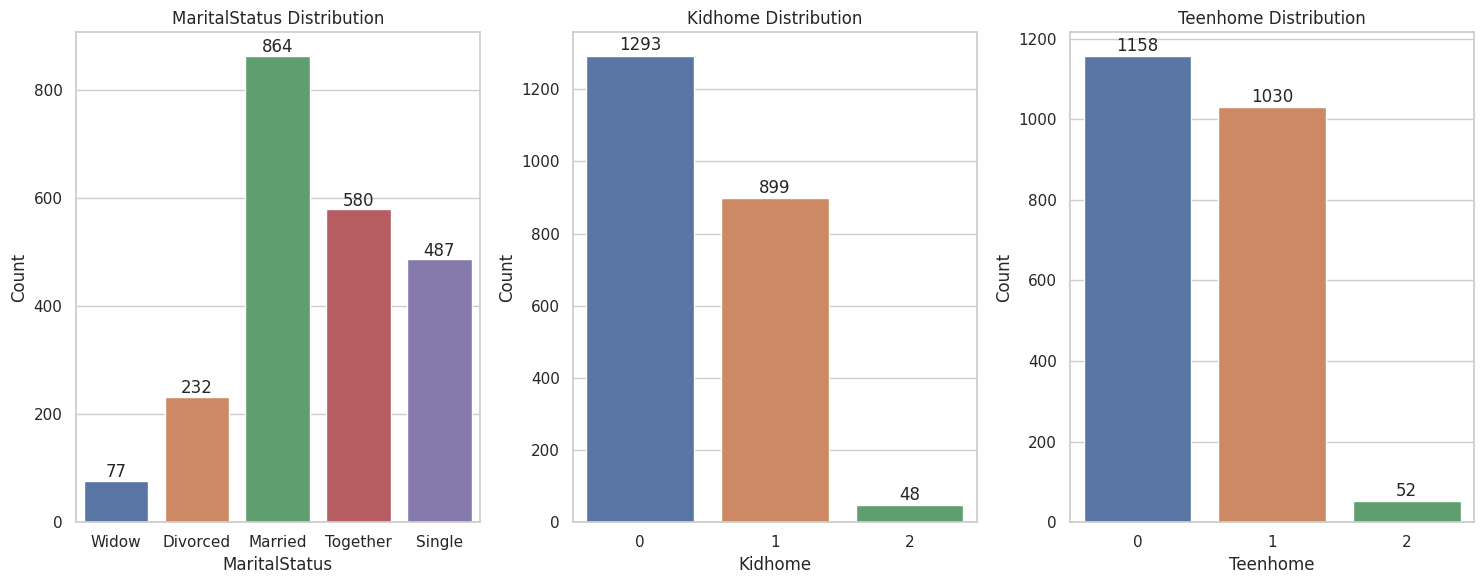

In [ ]:
multi_count_plot(df, ['MaritalStatus', 'Kidhome', 'Teenhome'])

In [ ]:
#https://colab.research.google.com/drive/12b3A93nCCk0mRY1kwfPgSG2OpTlMvBy-?usp=sharing


<ipython-input-15-b601c7e992ea>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



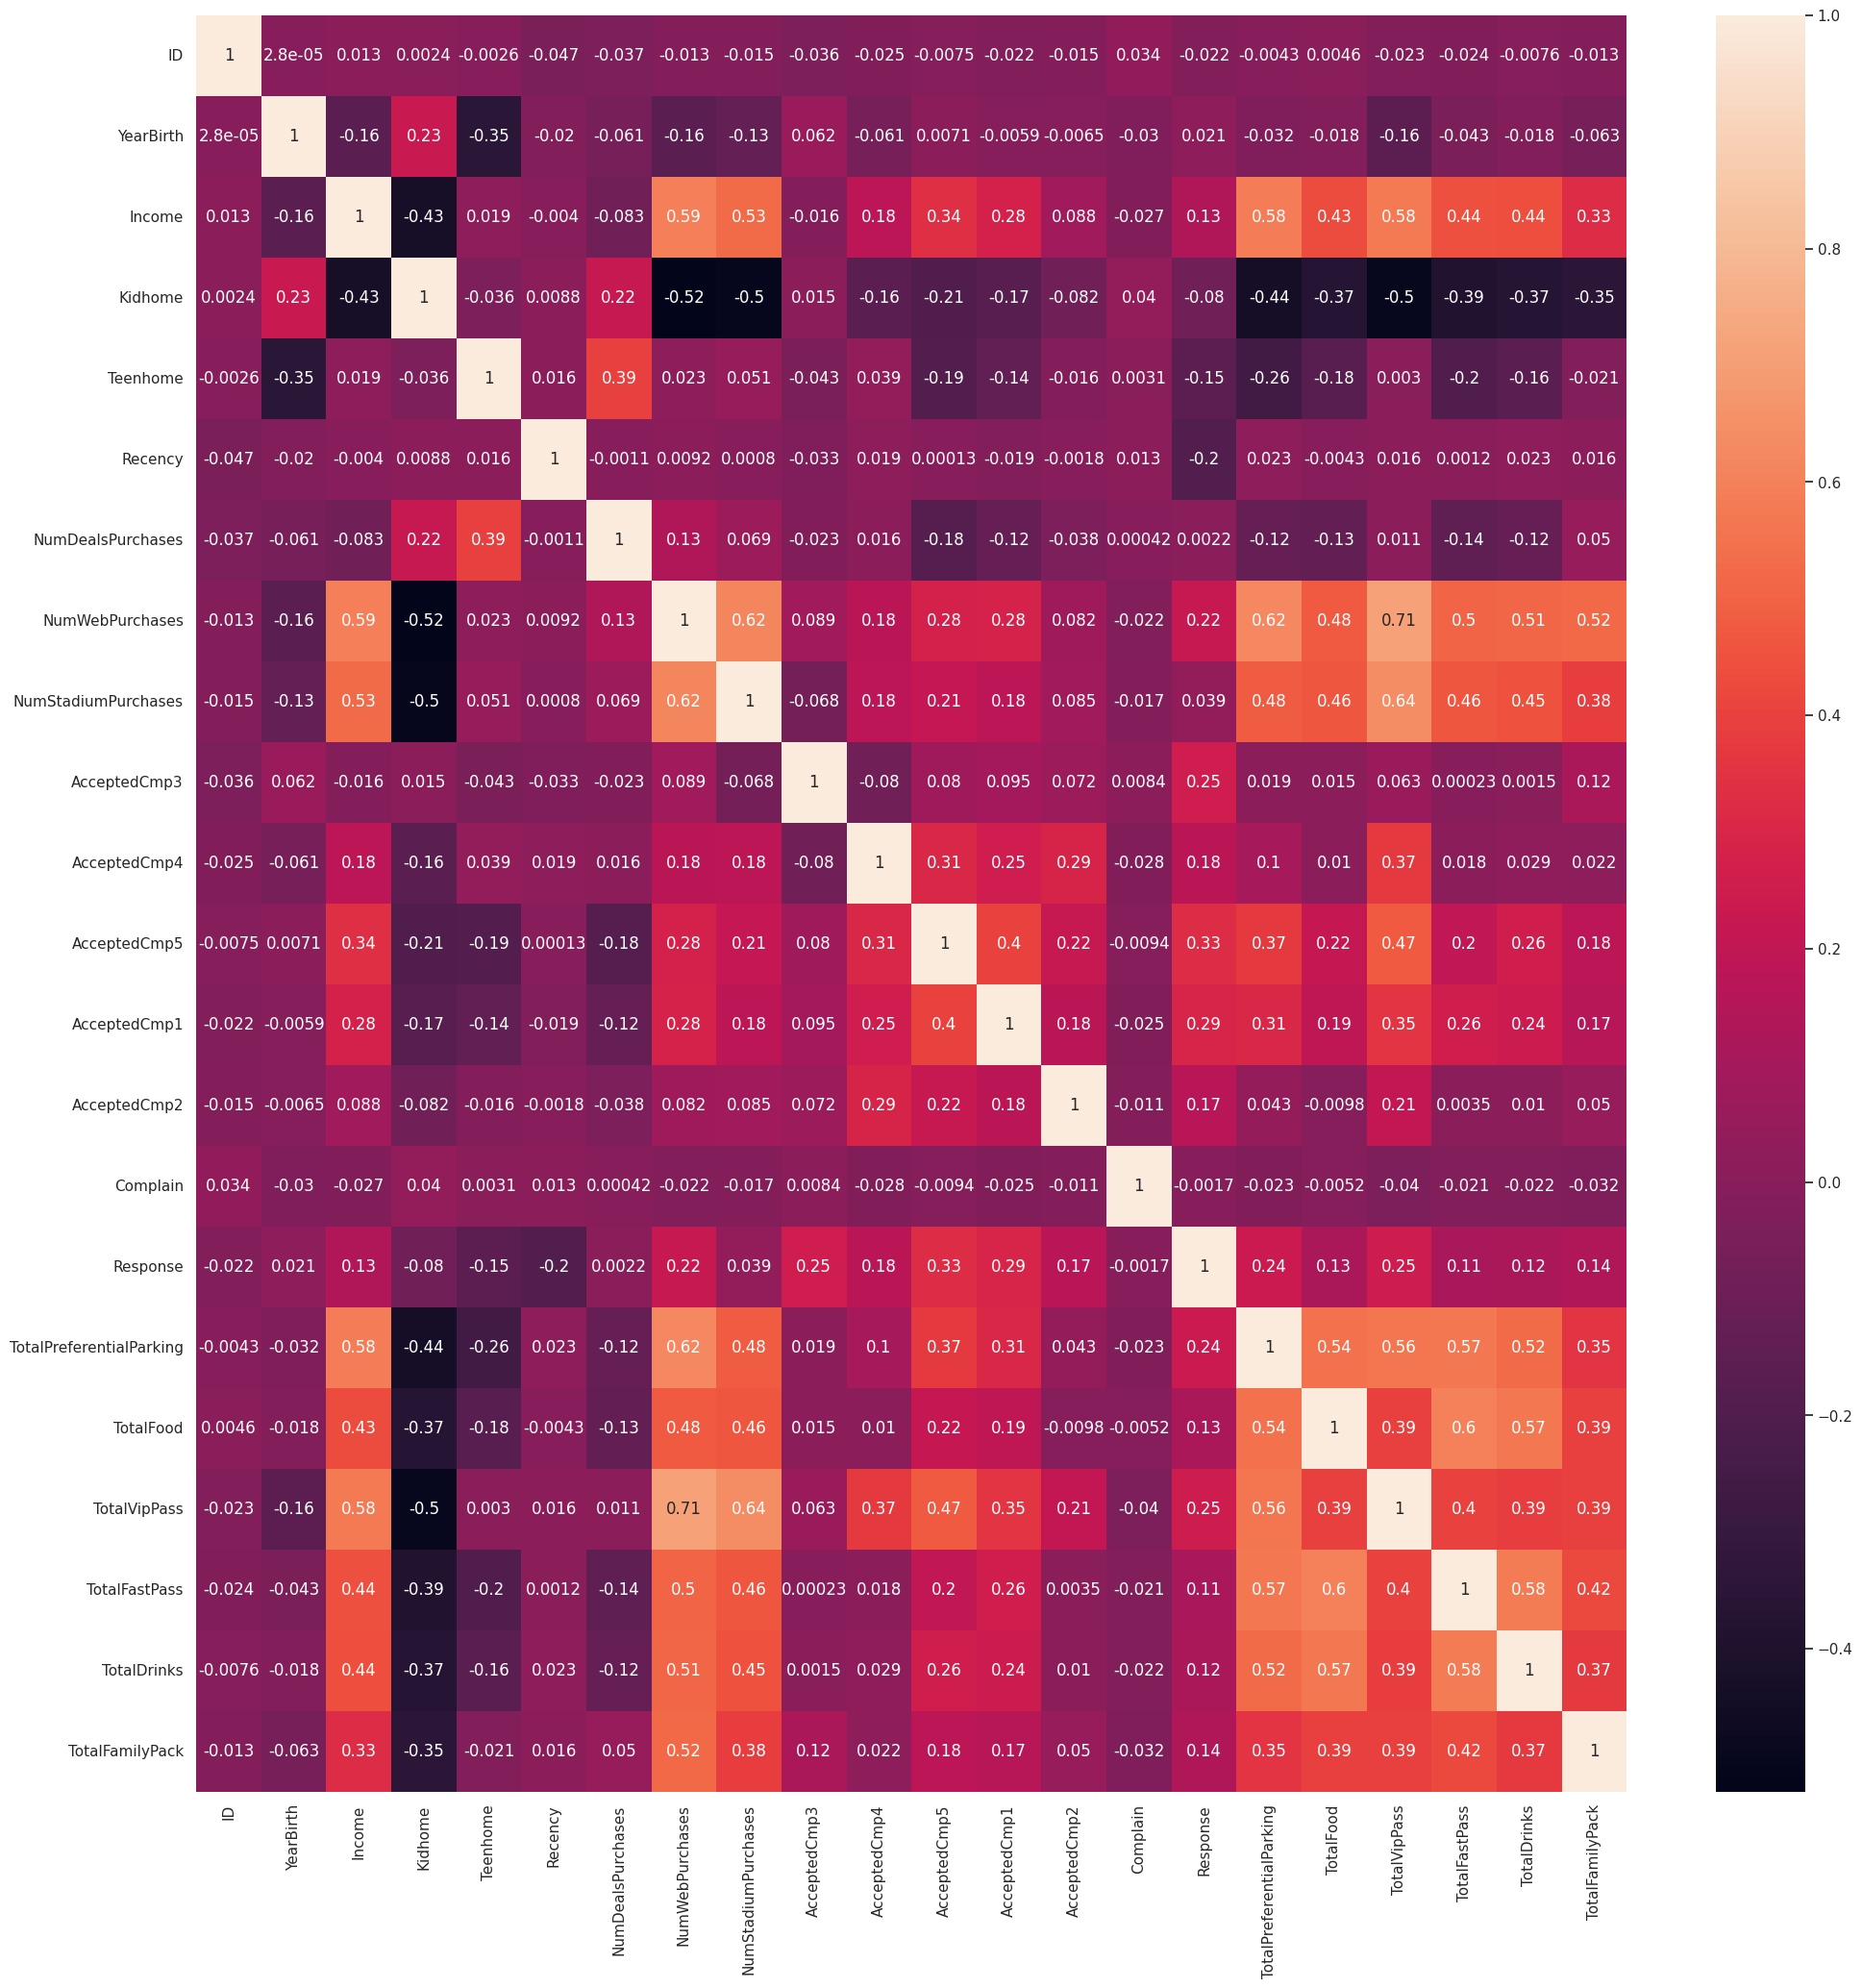

In [ ]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Income", marginal="box")
fig.show()


In [ ]:
df["Income"].max()

1333332.0

# Exploración YearBirth

In [ ]:
#sns.histplot(df, x='YearBirth', bins=15)
sorted_value_counts = df['YearBirth'].value_counts().sort_index(ascending=True)#nunique()#.value_counts()#unique()
fig = px.histogram(df, x="YearBirth", marginal="box")
fig.show()

In [ ]:
df['YearBirth'].min()

1902

In [ ]:
df['YearBirth'].max()

2005

In [41]:
#sorted_value_counts df
df[df['Income'] > 1000000]

,ID,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalPreferentialParking,TotalFood,TotalVipPass,TotalFastPass,TotalDrinks,TotalFamilyPack
543,9432,1986,Graduation,Together,1333332.0,1,0,2022-06-02,23,4,...,0,0,0,0,25,28,20,10,2,36


## Education Exploration

In [ ]:
import plotly.express as px
education_order = df['Education'].value_counts().index.tolist()
fig = px.histogram(df, x='Education', color='Education', title='Education type grouping', category_orders={'Education': education_order})
fig.show()